# Correleation Anaysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
recipes = pd.read_csv('RAW_recipes_textProc_VecTag(th=5)_VecIng(th=500).csv')
interactions = pd.read_csv('RAW_interactions_textProc.csv')

First, we check what features are strongly correlated with 'rating'. From recipes dataset, we brought minuites, n_steps, n_ingredients to see whether those are correlated with rating to build prediction model.

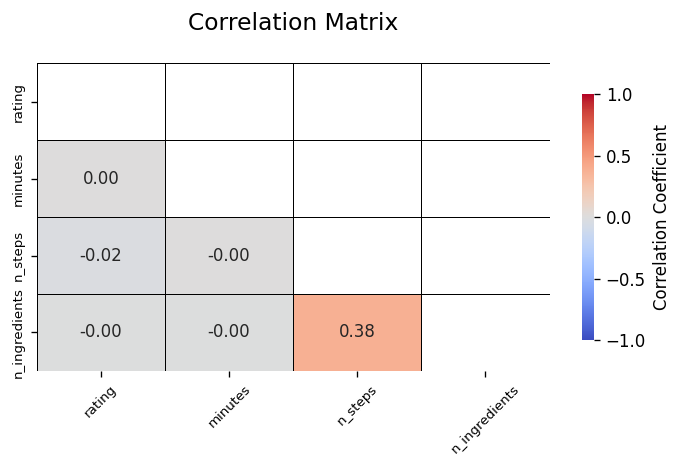

In [19]:
# Rename and merge datasets on 'recipe_id'
recipes = recipes.rename(columns={'id': 'recipe_id'})
data = interactions.merge(recipes, on='recipe_id')

# Selecting relevant columns (numerical features + rating)
numerical_columns = [
    'rating', 'minutes', 'n_steps', 'n_ingredients'
]
data_filtered = data[numerical_columns]

# Dropping rows with missing values
data_filtered = data_filtered.dropna()

# Calculate correlation matrix
corr_matrix = data_filtered.corr().round(3)

# Plot the correlation matrix with improved customization
plt.figure(figsize=(6, 4), dpi=120)  # Adjust the figure size and resolution
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask the upper triangle

sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, 
    annot=True,  
    cmap='coolwarm',  
    fmt=".2f",  
    linewidths=0.5,  
    linecolor='black',  
    mask=mask,  
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  
)


plt.title("Correlation Matrix", fontsize=14, pad=20)
plt.xticks(fontsize=8, rotation=45)  
plt.yticks(fontsize=8) 
plt.tight_layout()  
plt.show()

as we see the correlation, we can 